### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量为文字与其颜色是否一致。因变量为说出打印颜色的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- 此任务的零假设$H_0$为:  
*当文字与其颜色匹配时* 说出文字颜色的反应时间 **等于** *当文字与其颜色不匹配时* 说出文字颜色的反应时间，数学公式表示为：  
$H_0：\mu_{颜色一致} = \mu_{颜色不一致}$
- 对立假设$H_A$为:  
*当文字与其颜色匹配时* 说出文字颜色的反应时间 **不等于** *当文字与其颜色不匹配时* 说出文字颜色的反应时间，数学公式表示为：  
$H_A：\mu_{颜色一致} \not= \mu_{颜色不一致}$  

其中：$\mu_{颜色一致}$表示当文本颜色一致时，总体的反应时间平均值；$\mu_{颜色不一致}$则表示当文本颜色不一致时，总体的反应时间平均值。  

此实验是同一组实验者参加了两次实验（两次实验情况是，只有一个条件有变化，即文字及其颜色是否一致），而不是两组实验者分别参加实验，因此是相依样本而不是独立样本。又因为对于颜色与文字一致与否的反应时间，我们并不关心或长或短，我们只是关心是否一样，因此为双尾检验。再者，我们没有总体的均值和标准差，而且我们的样本量只有24，所以我们无法应用Z检验，而T检验只需要少量样本的统计即可，因此选择相依样本双尾T检验。通过后面的图表，我们也可以看出，这两组实验结果的数据是连续的且大致是呈现正态分布的，受试者是随机且相互独立的，因此可以推断出总体的实验结果数据也应该是大致呈正态分布，也满足相依样本T检验的假设前提。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
#导入所需要的库

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#加载数据集

df = pd.read_csv('stroopdata.csv')

In [5]:
#查看两组数据的基本信息
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [19]:
#计算T统计的相关变量

#样本量
n = df['Congruent'].count()

#均值差
mean_diff = df['Incongruent'].mean() - df['Congruent'].mean()

#自由度
free_d = n-1

#差的均值
diff_avg = (df['Incongruent']-df['Congruent']).mean()

#差异的样本偏差
sd = np.sqrt(np.sum((df['Incongruent']-df['Congruent']-diff_avg)**2)/free_d)

#T_statistical
Ts = mean_diff/(sd/np.sqrt(n))

print '均值差为：', mean_diff
print '自由度为：', free_d
print '差异的样本偏差为：', sd
print 'T_statistical为：', Tc

均值差为： 7.96479166667
自由度为： 23
差异的样本偏差为： 4.86482691036
T_statistical为： 8.02070694411


从平均值可以看出来，两个测试的平均值还是有些差距的，而且不一致的情况下，反应速度要慢一些。这两组数据的差异的样本偏差（sd）约为4.865，从而计算得到的T-statistical约为8.021。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

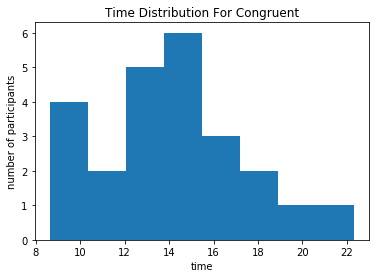

In [28]:
df['Congruent'].plot(kind = 'hist', bins=8)
plt.title('Time Distribution For Congruent')
plt.xlabel('time')
plt.ylabel('number of participants')

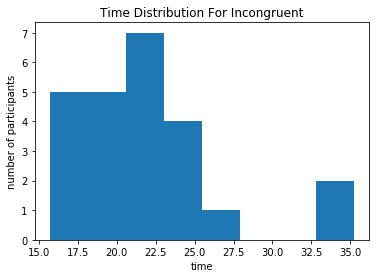

In [27]:
df['Incongruent'].plot(kind = 'hist', bins=8)
plt.title('Time Distribution For Incongruent')
plt.xlabel('time')
plt.ylabel('number of participants')

从图中可以看出，不一致（Incongruent）的反应时间总体要高出一致（congruent）的反应时间。根据前面得到的均值差，可以初步判断：不一致的时间要大于一致的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

置信水平设为95%，因此alpha为0.05、自由度为23。查表可知T_critical为2.069，而计算得到的T_statistical为8.021，P小于0.05，均值相等的概率非常小，因此拒绝零假设。这和最初分析时推测的结论一致：当文字条件一致时所用的反应时间 和 当文字条件不一致时所用的反应时间 是不一样的，而且分析中所用的均值差为Incongruent(不一致)减去Congruent(一致)，且得出来的T_statistical为正，因此最后得出的结论是：不仅是所用时间不相同，而且是不一致条件下所用的反应时间还远多于一致条件下所用的反应时间。